# Wrangling and Visualizing Musical Data

1. Introduction

How do musicians choose the chords they use in their songs? Do guitarists, pianists, and singers gravitate towards different kinds of harmony?

In [1]:
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.1     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'dplyr' was built under R version 3.6.1"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
bb<- read_csv('bb_chords.csv')
bb

Parsed with column specification:
cols(
  year = col_double(),
  chord = col_character(),
  root_integer = col_character(),
  root_roman = col_character(),
  quality = col_character(),
  title_compressed = col_character(),
  artist_compressed = col_character(),
  title = col_character(),
  artist = col_character()
)


year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown


2. The most common chords

A key element of the style of any popular musical artist is the kind of chords they use in their songs. But not all chords are created equal! In addition to differences in how they sound, some chords are simply easier to play than others. On top of that, some chords are easier to play on one instrument than they are on another. And while master musicians can play a wide variety of chords and progressions with ease, it’s not a stretch to think that even the best musicians may choose more “idiomatic” chords and progressions for their instrument.

In [18]:
bb_count <- bb  %>% 
    count(chord, sort=T)

head(bb_count)
bb_count

chord,n
<chr>,<int>
C:maj,1183
G:maj,1140
A:maj,1071
D:maj,1054
F:maj,859
E:maj,839


chord,n
<chr>,<int>
C:maj,1183
G:maj,1140
A:maj,1071
D:maj,1054
F:maj,859
E:maj,839
Bb:maj,718
B:maj,503
Ab:maj,375


3. Visualizing the most common chords

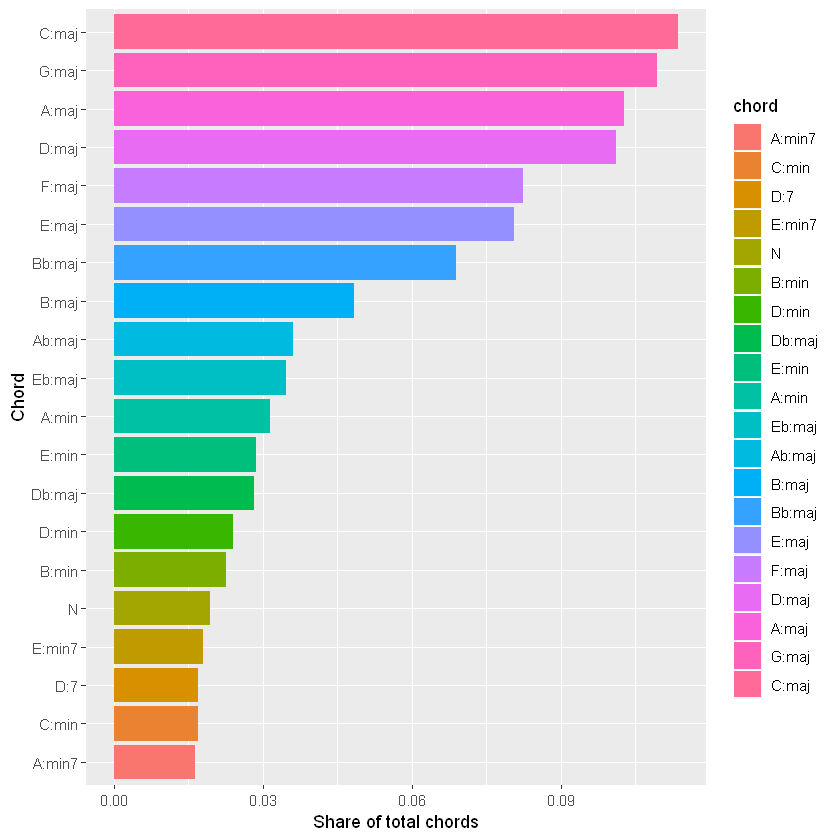

In [8]:
bb_count %>%
  slice(1:20) %>%
  mutate(share = n / sum(n),
         chord = reorder(chord, share)) %>%

  ggplot(aes(x = chord, y = share, fill = chord)) +
  geom_col()+
  coord_flip() +
  xlab("Chord") +
  ylab("Share of total chords") 

4. Chord “bigrams”

A chord change is simply a bigram from a two-“word” phrase to composed of a starting chord and a following chord. Here are the most common two-chord “phrases” in the dataset.

In [11]:
bb_bigram_count <- bb %>%
    mutate(next_chord = lead(chord, 1), 
           next_title = lead(title, 1), 
           bigram =  str_c(chord, next_chord, sep = " ")) %>%
    filter(title == next_title) %>%
    count(bigram, sort = T)
tail(bb_bigram_count, 20)

bigram,n
<chr>,<int>
N F:maj(9),1
N F:sus4,1
N G:1,1
N G:13,1
N G:maj9,1
N G:min,1
"N G:sus4(b7,9)",1
"N G:sus4(b7,9,13)",1
N Gb:maj6,1


5. Visualizing the most common chord progressions

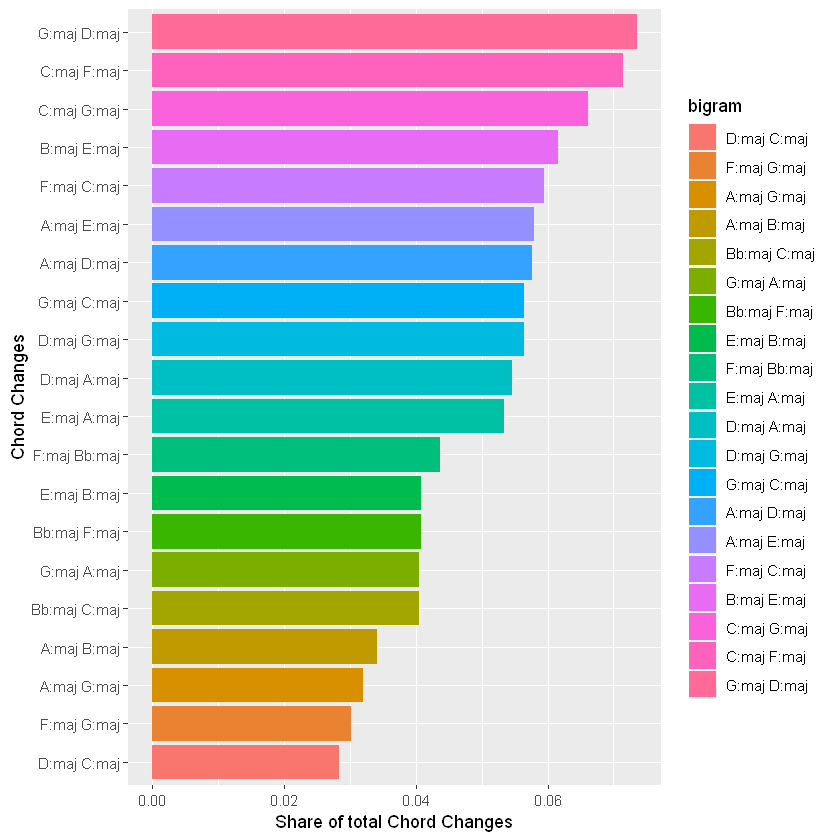

In [14]:
bb_bigram_count %>%
  slice(1:20) %>%
  mutate(share = n / sum(n),
         bigram = reorder(bigram, share)) %>%
  ggplot(aes(x = bigram, y = share, fill = bigram)) +
  geom_col()+
  coord_flip() +
  xlab("Chord Changes") +
  ylab("Share of total Chord Changes")

6. Finding the most common artists

In [15]:
bb_30_artists <- bb %>%
    select(artist, title) %>%
    unique() %>%
    count(artist, sort = T)

bb_30_artists %>%
  slice(1:30)

artist,n
<chr>,<int>
Elvis Presley,13
Brenda Lee,9
Dion,8
Bob Seger,7
James Brown,7
Kenny Rogers,7
The Beatles,7
Chicago,6
Dr. Hook,6


In [ ]:
7. Tagging the corpus

In [16]:
tags <- tibble(
  artist = c('Abba', 'Billy Joel', 'Elton John', 'Stevie Wonder', 'The Rolling Stones', 'The Beatles', 'Eric Clapton'),
  instrument = c('piano', 'piano', 'piano', 'piano', 'guitar', 'guitar', 'guitar'))

bb_tagged <- bb %>% inner_join(tags, by = 'artist')
    
    
bb_tagged

year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist,instrument
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1984,C:maj,0,I,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,D:min,2,II,min,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,F:maj,5,IV,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,G:maj,7,V,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,C:maj,0,I,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,D:min,2,II,min,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,F:maj,5,IV,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,G:maj,7,V,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,C:maj,0,I,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano


8. Comparing chords in piano-driven and guitar-driven songs

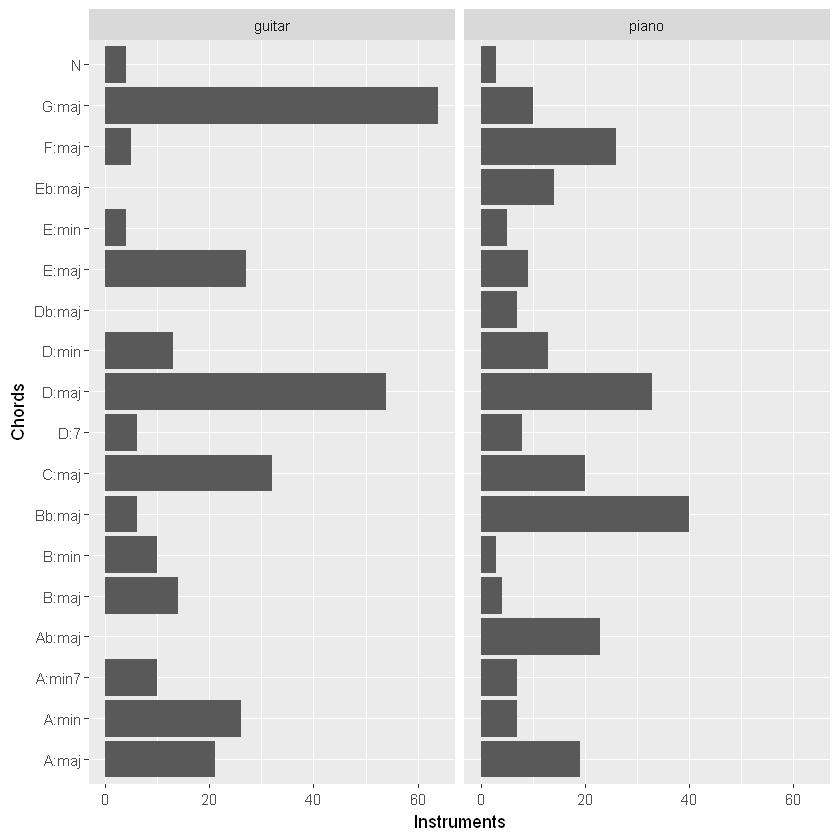

In [20]:
if (FALSE){
bb_count %>%
  slice(1:20) %>%
  mutate(share = n / sum(n),
         chord = reorder(chord, share))
}


top_20 <- bb_count$chord[1:20]

bb_tagged %>%
  filter(chord %in% top_20) %>%
  count(chord, instrument, sort = T) %>%
  ggplot(aes(x = chord, y = n))+
  geom_col()+
  coord_flip() +
  xlab("Chords") +
  ylab("Instruments") +
  facet_grid(~instrument)

9. Comparing chord bigrams in piano-driven and guitar-driven songs

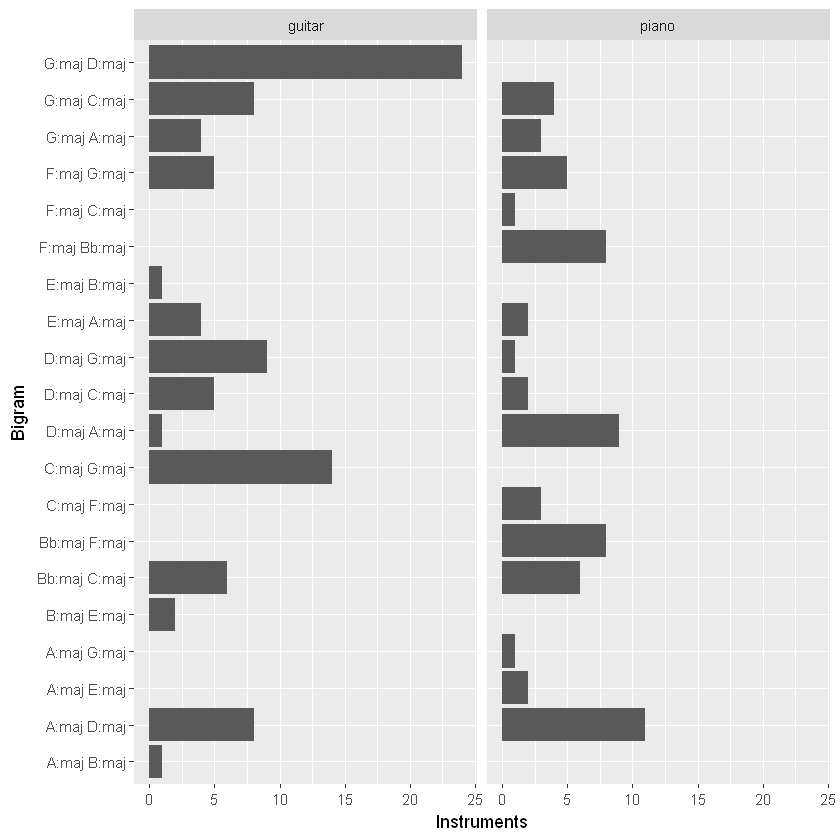

In [21]:
if FALSE{   
  bb_bigram_count <- bb %>%
    mutate(next_chord = lead(chord, 1), 
           next_title = lead(title, 1), 
           bigram =  str_c(chord, next_chord, sep = " ")) %>%
    filter(title == next_title) %>%
    count(bigram, sort = T)
}

if FALSE{
  tags <- tibble(
  artist = c('Abba', 'Billy Joel', 'Elton John', 'Stevie Wonder', 'The Rolling Stones', 'The Beatles', 'Eric Clapton'),
  instrument = c('piano', 'piano', 'piano', 'piano', 'guitar', 'guitar', 'guitar'))

  bb_tagged <- bb %>% inner_join(tags, by = 'artist')
}

top_20_bigram <- bb_bigram_count$bigram[1:20]


bb_tagged %>%
mutate(next_chord = lead(chord, 1), next_title = lead(title, 1), bigram =  str_c(chord, next_chord, sep = " ")) %>%
    filter(title == next_title) %>%
    count(bigram,instrument, sort = T) %>%
    filter(bigram %in% top_20_bigram)%>%
   ggplot(aes(x = bigram, y = n))+
  geom_col()+
  coord_flip() +
  xlab("Bigram") +
  ylab("Instruments") +
  facet_grid(~instrument)

10. Conclusion